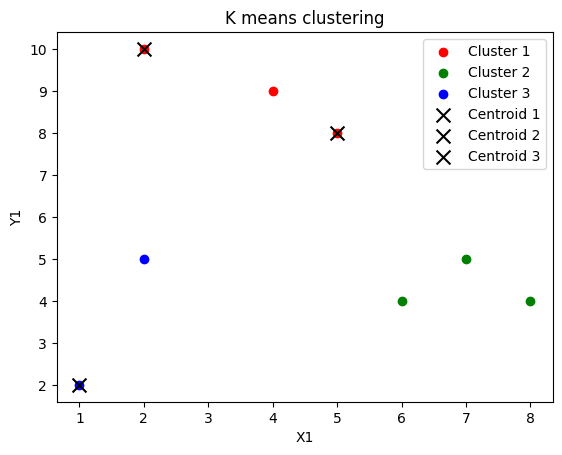

,X1,Y1,Euclidean_Dist_Centroid_1,Euclidean_Dist_Centroid_2,Euclidean_Dist_Centroid_3,Cluster,New_Cluster
0,2,10,1.943651,7.557189,6.519202,1,1
1,2,5,4.333333,5.044249,1.581139,3,3
2,8,4,6.616478,1.054093,6.519202,2,2
3,5,8,1.666667,4.176655,5.700877,1,1
4,7,5,5.206833,0.666667,5.700877,2,2
5,6,4,5.517648,1.054093,4.527693,2,2
6,1,2,7.490735,6.437736,1.581139,3,3
7,4,9,0.333333,5.547772,6.041523,1,1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
centroid_1, centroid_2, centroid_3 = [2, 10], [5, 8], [1, 2]

def compute_euclidean_distance(df, centroid_1, centroid_2, centroid_3):
    df['Euclidean_Dist_Centroid_1'] = np.sqrt((df['X1'] - centroid_1[0])**2 + (df['Y1'] - centroid_1[1])**2)
    df['Euclidean_Dist_Centroid_2'] = np.sqrt((df['X1'] - centroid_2[0])**2 + (df['Y1'] - centroid_2[1])**2)
    df['Euclidean_Dist_Centroid_3'] = np.sqrt((df['X1'] - centroid_3[0])**2 + (df['Y1'] - centroid_3[1])**2)
    return df

def compute_cluster(df):
    df['Cluster'] = df[['Euclidean_Dist_Centroid_1', 'Euclidean_Dist_Centroid_2', 'Euclidean_Dist_Centroid_3']].idxmin(axis=1)
    df['Cluster'] = df['Cluster'].map({
        'Euclidean_Dist_Centroid_1': 1,
        'Euclidean_Dist_Centroid_2': 2,
        'Euclidean_Dist_Centroid_3': 3
    })
    return df

def compute_new_centroids(df):
    centroid_1 = df[df['Cluster'] == 1][['X1', 'Y1']].mean().tolist()
    centroid_2 = df[df['Cluster'] == 2][['X1', 'Y1']].mean().tolist()
    centroid_3 = df[df['Cluster'] == 3][['X1', 'Y1']].mean().tolist()
    return centroid_1, centroid_2, centroid_3

def clustering(df, iters,centroid_1, centroid_2, centroid_3):
    for i in range(iters):
        # Compute distances based on the current centroids
        df = compute_euclidean_distance(df, centroid_1, centroid_2, centroid_3)
        
        # Assign clusters based on the closest centroid
        df = compute_cluster(df)
        
        # Compute new centroids
        centroid_1, centroid_2, centroid_3 = compute_new_centroids(df)
        
    # Assign final clusters based on the new centroids
    df = compute_euclidean_distance(df, centroid_1, centroid_2, centroid_3)
    df['New_Cluster'] = df[['Euclidean_Dist_Centroid_1', 'Euclidean_Dist_Centroid_2', 'Euclidean_Dist_Centroid_3']].idxmin(axis=1)
    df['New_Cluster'] = df['New_Cluster'].map({
        'Euclidean_Dist_Centroid_1': 1,
        'Euclidean_Dist_Centroid_2': 2,
        'Euclidean_Dist_Centroid_3': 3
    })
    return df


iters = 100
df = clustering(df, iters,centroid_1,centroid_2,centroid_3)
df

clusters = [1,2,3]
colors = ['r','g','b']
for cluster,color in zip(clusters,colors):
    subset = df[df['New_Cluster'] == cluster]
    plt.scatter(subset['X1'],subset['Y1'],c=color,label=f'Cluster {cluster}')
plt.scatter(centroid_1[0],centroid_1[1],c='black',marker='x',s=100,label='Centroid 1')
plt.scatter(centroid_2[0],centroid_2[1],c='black',marker='x',s=100,label='Centroid 2')
plt.scatter(centroid_3[0],centroid_3[1],c='black',marker='x',s=100,label='Centroid 3')
plt.title('K means clustering')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()
plt.show()
df

The zip function is a built-in Python function that takes two or more iterable objects (like lists or tuples) and returns an iterator that produces tuples containing elements from the input iterables, paired element-wise.

In [ ]:
a = [1, 2, 3]
b = ['a', 'b', 'c']
#output
(1, 'a'), (2, 'b'), (3, 'c')
